## Problem Statement
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

### Business Objectives
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

In [1]:
#Load Libraries
import pandas as pd

In [2]:
#Load the Dataset
df = pd.read_csv('https://bit.ly/2XZK7Bo')

In [23]:
#Check the first 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [24]:
#Check the last five records
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [25]:
#Sample 10 records
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7596,7597,15794868,Nnonso,599,Germany,Male,40,10.0,137456.28,2,1,1,14113.11,0
6436,6437,15723216,Greco,623,Germany,Male,33,2.0,80002.33,1,1,1,104079.62,0
9585,9586,15610557,McCarthy,695,Spain,Female,35,NaN,79858.13,2,1,1,127977.66,0
2502,2503,15782659,Mamelu,527,France,Male,32,0.0,0.00,1,1,0,109523.88,0
6301,6302,15683183,Volkova,766,Germany,Female,45,6.0,97652.96,1,1,0,127332.33,0
5365,5366,15774104,Chukwualuka,539,Spain,Male,39,2.0,0.00,2,1,1,48189.94,0
1379,1380,15571752,Romani,668,Germany,Female,32,NaN,92041.87,1,1,1,43595.90,0
3587,3588,15599410,Stanley,721,France,Male,41,2.0,0.00,2,1,0,168219.75,0
6304,6305,15653455,Smith,648,France,Female,38,2.0,0.00,2,0,1,9551.49,0
3283,3284,15775335,Ellis,635,Germany,Female,48,4.0,81556.89,2,1,0,191914.37,0


In [30]:
#Check summary statistics of Data Set
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
#Check for null values
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [33]:
# Check for duplicates
df.duplicated().sum()

0

In [34]:
#Check data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Observation
1. Tenure has 909 Missing Values.

2. The first three Columns are not useful i.e RowNumber,CustomerId and Surname

3. Lower cases for column names and rename HasCrCard.

4. There are two Categorical columns that we need to deal with i.e Geography and Gender

In [39]:
# Fixing the Tenure columns that has missing values.

df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)

In [41]:
# Drop Columns that are not useful
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [43]:
#Changing column names to lower case
df.columns = df.columns.str.lower()

In [45]:
#Rename the hascrcard to hascreditcard
df.rename(columns={'hascrcard':'hascreditcard'}, inplace= True)

In [48]:
df.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [49]:
#Dealing with the Categorical Columns

OHE = pd.get_dummies(df , drop_first= True)

In [50]:
OHE.head()

,creditscore,age,tenure,balance,numofproducts,hascreditcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


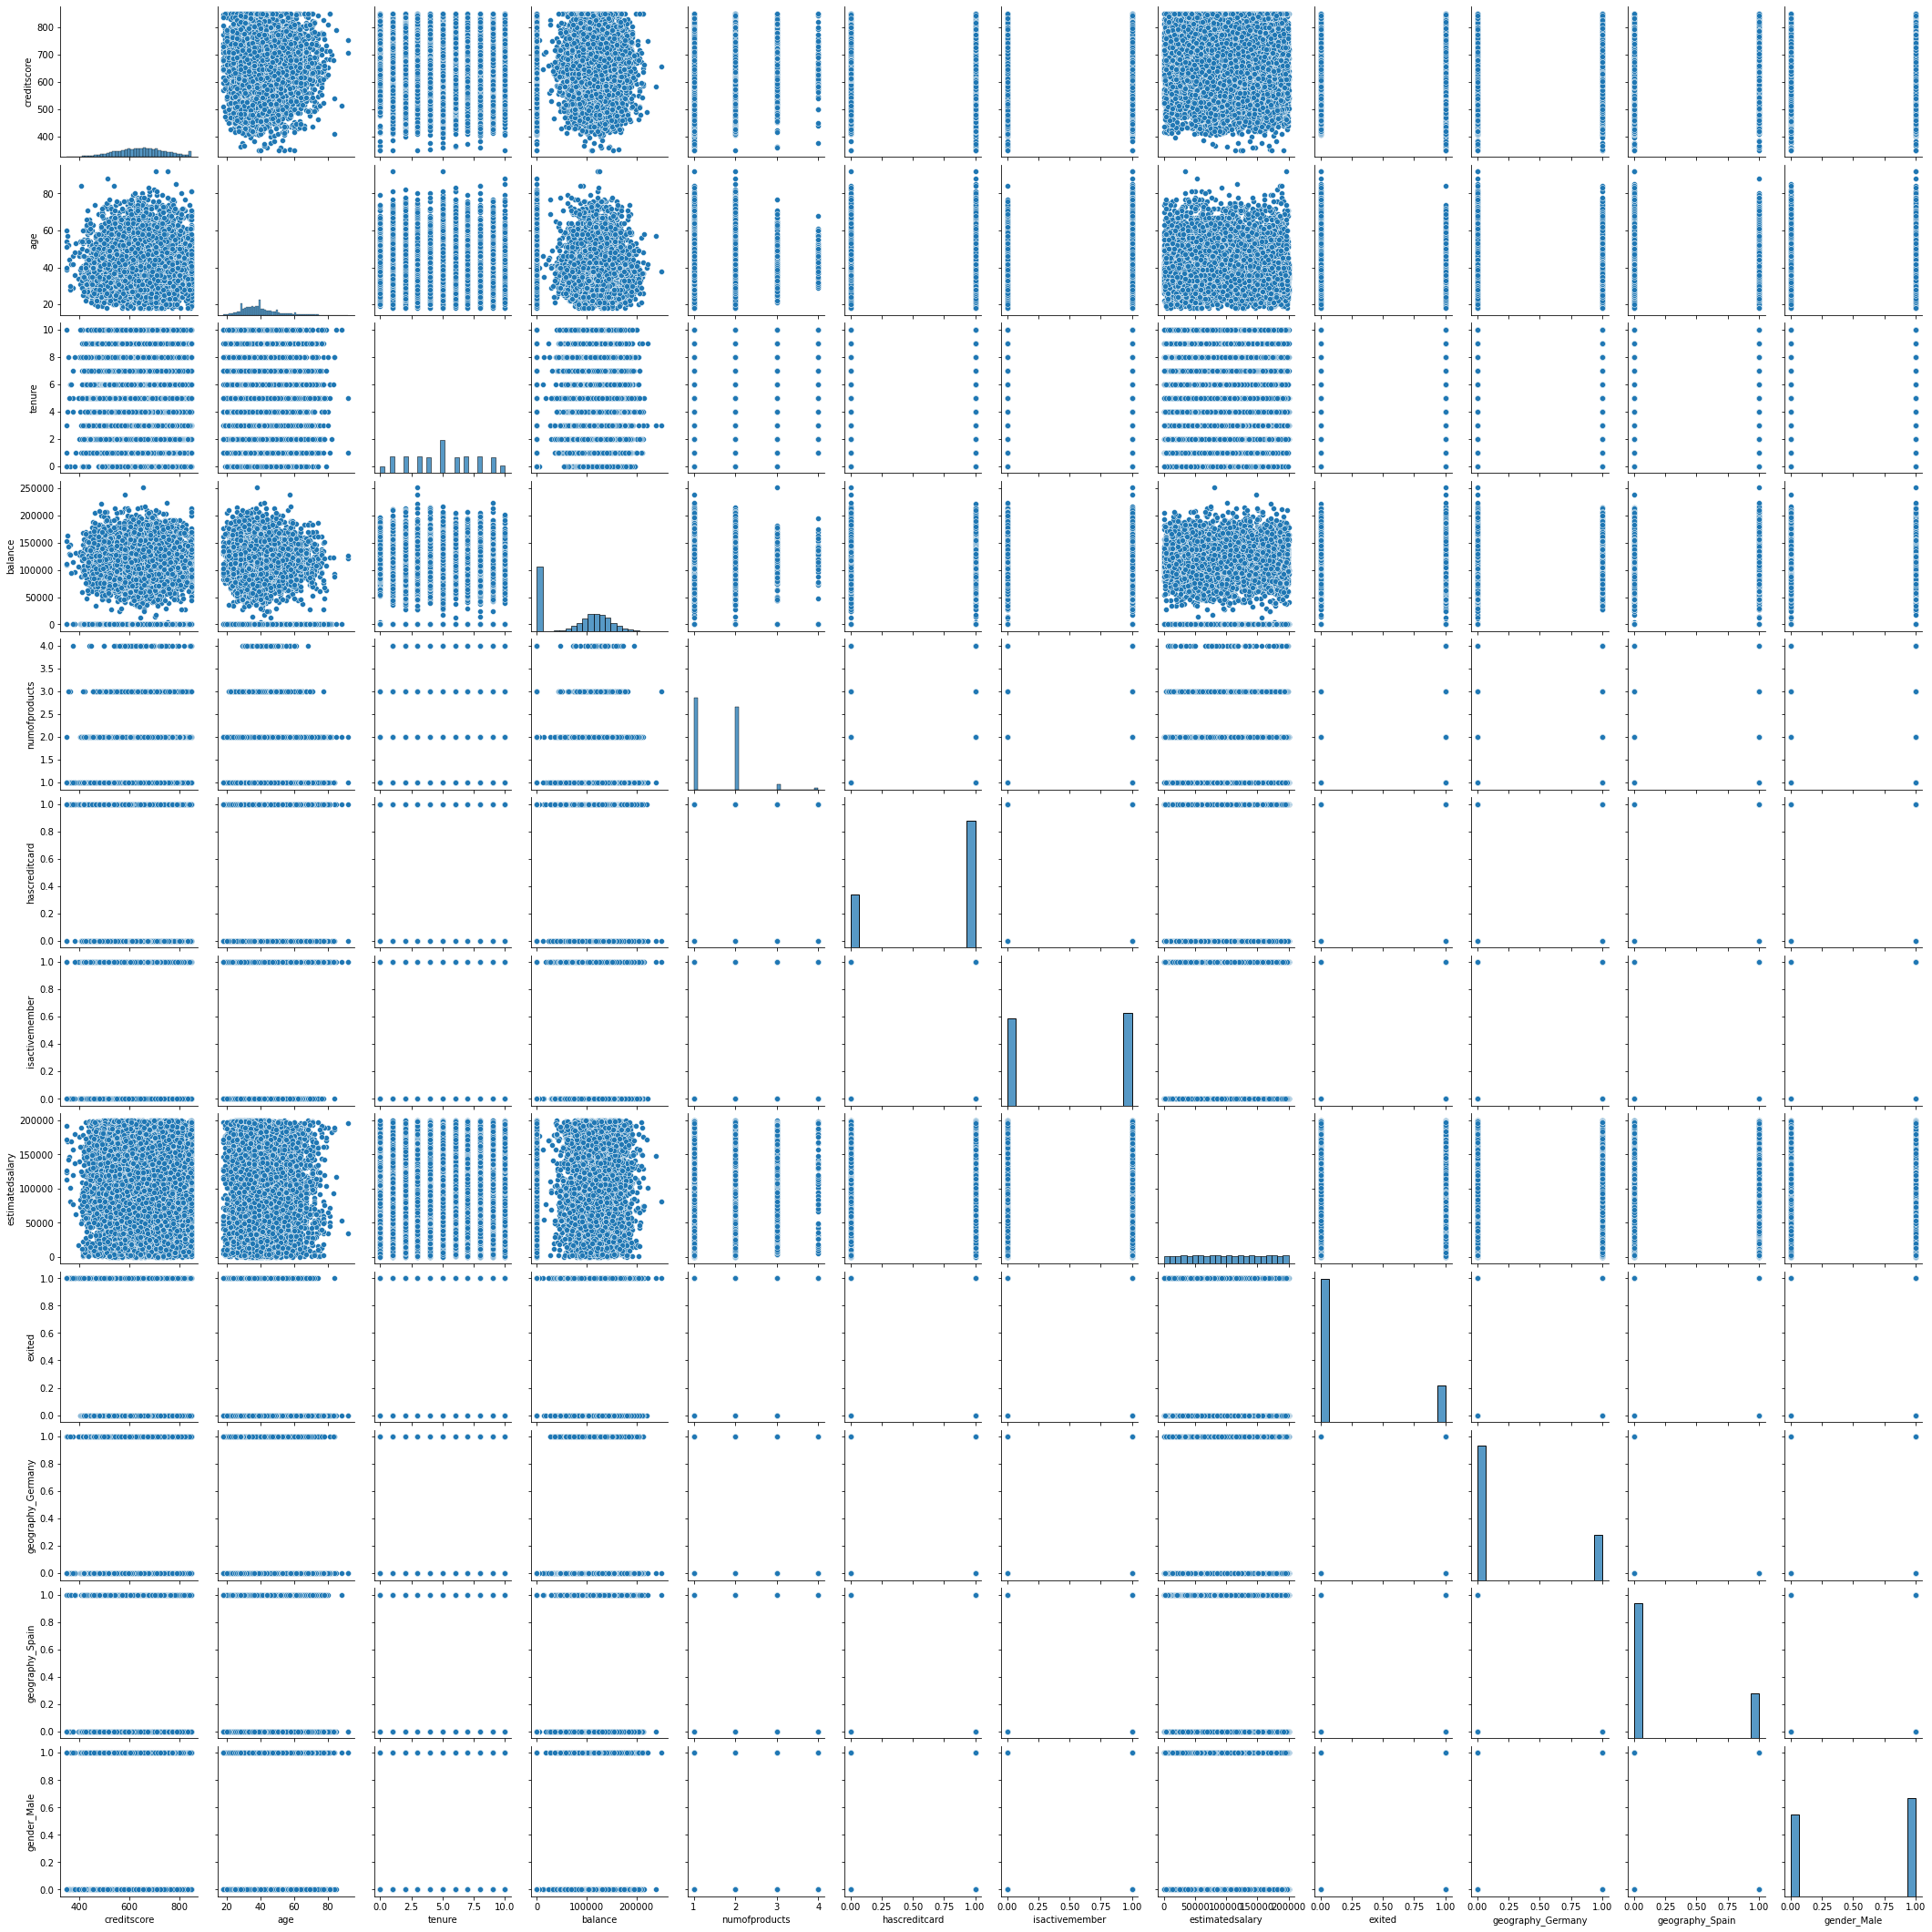

In [51]:
# Brief View of Data
import seaborn as sns
sns.pairplot(OHE)

In [52]:
#Selecting the features

X = OHE.drop('exited', axis=1)
y = OHE['exited']

In [53]:
# Split the data set into train, validation and test sets.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [54]:
#Training Model with model Imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regressor = LogisticRegression(random_state=42)

#Fit the Data

regressor.fit(X_train,y_train)

# Predict
predictor_train = regressor.predict(X_train)
predictor_test = regressor.predict(X_test)

In [55]:
# Print the scores
print('Train Accuracy :',accuracy_score(predictor_train,y_train))
print('Test Accuracy :',accuracy_score(predictor_test,y_test))

Train Accuracy : 0.7898333333333334
Test Accuracy : 0.79


In [56]:
# Check the F1 Score
from sklearn.metrics import f1_score
print('F1 Score :', f1_score(predictor_train, y_train))

F1 Score : 0.084241103848947


In [60]:
#Improving the Model through upsampling
from sklearn.utils import shuffle
def upsample(X, y, repeat):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]
#features_train, features_valid, target_train, target_valid
#X_train, X_test, y_train, y_test
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    X_train, y_train, 10
)

model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(X_test)
print('F1:', f1_score(y_test, predicted_valid))

F1: 0.3681093394077448


### Some improvements noted although not yet at target of 0.59. Time for Down Sampling.

In [61]:
# Improving the Model through Down Sampling

def downsample(X, y, fraction):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    X_train, y_train, 0.1
)

model2 = LogisticRegression(random_state=42, solver='liblinear')
model2.fit(features_downsampled, target_downsampled)
predicted_valid = model2.predict(X_test)
print('F1:', f1_score(y_test, predicted_valid))

F1: 0.36969420356001825


In [90]:
## Some improvements but we have not achieved our target. Time to try with Random Forests Classifiers
#and using grid search to get the best parameters
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
depth_param = {'n_estimators':range(1,200)}
RandForestMod = RandomForestClassifier(random_state=42, max_depth = 8,class_weight='balanced')
RandForestOpt = GridSearchCV(RandForestMod, depth_param)
RandForestOpt.fit(X_train, y_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(X_test)
print("F1:", f1_score(y_test, RandForestOpt_predicted_valid))
print('Accuracy:', RandForestOpt.score(X_test, y_test))
print("AUC-ROC:", roc_auc_score(y_test, RandForestOpt.predict_proba(X_test)[:,1]))

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=167,
                       random_state=42)
F1: 0.6400862068965517
Accuracy: 0.833
AUC-ROC: 0.8702639942266996


### Conclusion

To Get the best F1 score, I had to use a Random Forest Classifier with grid search to get the best Hyper parameters. As well I had restrict class weights to Balanced to  automatically assigns the class weights inversely proportional to their respective frequencies.

This produced F1 score of 0.64 with Accuracy of 0.833 and AUC-ROC of 0.87.

Did we have the best Data to Solve the problem?

Yes we did.

What can we improve on the Model?

Instead of doing a very detailed hyper parameter search using the extensive Grid Search, we can improve by doing a randomized Search.